# Scraping and Classifying Indeed Job Postings for Data Occupations

### Dimitri Linde / June 2017

<img src="https://qph.ec.quoracdn.net/main-qimg-7d724d66f0524d63c71283eafa60b5e3" style>

In [134]:
from lxml import html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

# Part 1: Scraping HTML From Relevant Indeed Postings

In order to test whether I can a) classify whether a job posting is a data science job or a job in some related field and b) distinguish high-wage jobs from lower wage jobs, I need to scrape job postings first. Below, I've written a function to, given a seed url, crawl the job aggregator www.indeed.com and parse the HTML on each page of postings to extract the urls that contain 'company,' a proxy that a posting is hosted at Indeed. All url's containing 'company are hosted on indeed but not all postings hosted on Indeed contain 'company.' Information on postings hosted on Indeed can, like searching for urls on Indeed, be parsed with a one-size fits all approach. I then append the Indeed postings containing 'company' to a list and, after removing the duplicate values, return the list once the 100 or fewer pages pertaining to the seed url have been crawled. There is also a print function, to let us know the crawl_indeed function has concluded as well as how many postings have been collected.

## Get posting urls

In [2]:
def crawl_indeed(link):
    i = 0
    indeed_postings = []
    while i < 1000:
        response = requests.get(link+str(i))
        i +=10
        HTML = response.text
        tree = html.fromstring(HTML)
        urls = tree.xpath('////div[@id]/h2[@id]/a[@class]/@href')
        for url in urls:
            if 'company' in url:
                indeed_url = 'http://www.indeed.com'+url
                indeed_postings.append(indeed_url)
    indeed_postings = np.unique(indeed_postings)
    print len(indeed_postings)
    return indeed_postings

### 50,000-75,000 Data Science, Data Analyst, Analytics, and Business Intelligence Jobs in Boston

To get a mix of data science and related occupations, I use the following keywords: 
* 'data science' 
* 'data analyst' 
* 'analytics' 
* 'business intelligence' 

I also define three salary tiers:
* 50,000 - 75,000
* 85,000 - 110,000
* 120,000+ (later revised down to 115K+)

In [7]:
ds_50 = crawl_indeed("https://www.indeed.com/jobs?q=data+science+%2450000-%2475000&l=Boston%2C+MA&start=")
da_50 = crawl_indeed("https://www.indeed.com/jobs?q=data+analyst+%2450000-%2475000&l=Boston%2C+MA&start=")
analytics_50 = crawl_indeed("https://www.indeed.com/jobs?q=analytics+%2450000-%2475000&l=Boston%2C+MA&start=")
bi_50 = crawl_indeed("https://www.indeed.com/jobs?q=business+intelligence+%2450000-%2475000&l=Boston%2C+MA&start=")

62
66
84
16


### 85,000 -110,00 Data Science, Data Analyst, Analytics, and Business Intelligence Jobs in Boston

In [9]:
ds_85 = crawl_indeed("https://www.indeed.com/jobs?q=data+science+%2485000-%24110000&l=Boston%2C+MA&start=")
da_85 = crawl_indeed("https://www.indeed.com/jobs?q=data+analyst+%2485000-%24110000&l=Boston%2C+MA&start=")
analytics_85 = crawl_indeed("https://www.indeed.com/jobs?q=analytics+%2485000-%24110000&l=Boston%2C+MA&start=")
bi_85 = crawl_indeed("https://www.indeed.com/jobs?q=business+intelligence+%2485000-%24110000&l=Boston%2C+MA&start=")

72
30
58
20


### 120,000+ Data Science, Data Analyst, Analytics, and Business Intelligence Jobs in Boston

In [10]:
ds_120 = crawl_indeed("https://www.indeed.com/jobs?q=data+science+%24120000&l=Boston%2C+MA&start=")
da_120 = crawl_indeed("https://www.indeed.com/jobs?q=data+analyst+%24120000&l=Boston%2C+MA&start=")
analytics_120 = crawl_indeed("https://www.indeed.com/jobs?q=analytics+%24120000&l=Boston%2C+MA&start=")
bi_120 = crawl_indeed("https://www.indeed.com/jobs?q=business+intelligence+%24120000&l=Boston%2C+MA&start=")

48
18
48
9


### Data Scientist Jobs in San Francisco

It will turn out that, after determining which postings I'd consider data science jobs, very few of the postings acquired with the keywords above qualify. The "data scientist" keyword turns out to be a far better proxy for data science job postings than "data science", so I search for data scientist at the higher income tiers, where we have fewer postings. San Francisco and New York do not churn up enough postings to analyze alone, so I also search across the US. Duplicates will be removed later.

In [11]:
dssf_115 = crawl_indeed("https://www.indeed.com/jobs?q=data+scientist+%24115%2C000&l=San+Francisco%2C+CA&start=")
dssf_80 = crawl_indeed("https://www.indeed.com/jobs?q=data+scientist+%2485000+-+%24110000&l=San+Francisco%2C+CA&start=")

26
24


### Data Scientist Jobs in New York City

In [12]:
dsny_115 = crawl_indeed("https://www.indeed.com/jobs?q=data+scientist+%24115000&l=New+York%2C+NY&start=")
dsny_80 = crawl_indeed("https://www.indeed.com/jobs?q=data+scientist+%2485000+-+%24110000&l=New+York%2C+NY&start=")

32
21


### Data Scientist Jobs in the USA

In [13]:
dsusa_115 = crawl_indeed("https://www.indeed.com/jobs?q=data+scientist+%24115000&l=United+States&start=")
dsusa_80 = crawl_indeed("https://www.indeed.com/jobs?q=data+scientist+%2485000+-+%24110000&l=United+States&start=")

62
83


## Concatenate the arrays at the same income level and remove any duplicates

This yields one array of postings at each income tier. Duplicates, between, for example, postings in the data science list and postings in the data scientist list, are removed.

In [14]:
data_50 = np.concatenate((ds_50,da_50,analytics_50,bi_50))
data_50 = np.unique(data_50)
print len(data_50)

190


In [15]:
data_85 = np.concatenate((ds_85,da_85,analytics_85, bi_85, dssf_80,dsny_80,dsusa_80))
data_85 = np.unique(data_85)
print len(data_85)

262


In [16]:
data_120 = np.concatenate((ds_120,da_120,analytics_120,bi_120, dssf_115,dsny_115,dsusa_115))
data_120 = np.unique(data_120)
print len(data_120)

199


## Create Dataframe

With the url's for relevant job postings that I've collected, I first want to put them into a dataframe. Once there, I want to iterate through the urls, extracting the HTML from that page and inserting it into the dataframe. Later, I'll use the HTML to extract information like job requirements and title, but which, once saved in a dataframe, I can access at any time. I'll also tag the postings with their income level.

In [26]:
def indeed_df(array, income_tier):
    df = pd.DataFrame(array, columns=['url'])
    for i in df.index:
        response = requests.get(df['url'][i])
        df.ix[i,'HTML'] = response.text
    df['category'] = income_tier
    return df

In [28]:
data_50_df = indeed_df(data_50, '50,000-75,000')
data_50_df.head()

,url,HTML,category
0,http://www.indeed.com/company/2020/jobs/Market...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","50,000-75,000"
1,http://www.indeed.com/company/AA-Search/jobs/M...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","50,000-75,000"
2,http://www.indeed.com/company/ABACS/jobs/Behav...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","50,000-75,000"
3,http://www.indeed.com/company/AGENCY-451/jobs/...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","50,000-75,000"
4,http://www.indeed.com/company/AKRAYA/jobs/Juni...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","50,000-75,000"


In [29]:
data_85_df = indeed_df(data_85, '85,000-110,000')
data_85_df.head()

,url,HTML,category
0,http://www.indeed.com/company/1988/jobs/Sybase...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","85,000-110,000"
1,http://www.indeed.com/company/AA-Search/jobs/F...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","85,000-110,000"
2,http://www.indeed.com/company/AFFOA/jobs/Deput...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","85,000-110,000"
3,http://www.indeed.com/company/AGENCY-451/jobs/...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","85,000-110,000"
4,http://www.indeed.com/company/AKRAYA/jobs/Busi...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","85,000-110,000"


In [30]:
data_115_df = indeed_df(data_120, '115,000+')
data_115_df.head()

,url,HTML,category
0,http://www.indeed.com/company/%E5%B9%BF%E4%B8%...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","115,000+"
1,http://www.indeed.com/company/3sixtyHR/jobs/De...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","115,000+"
2,http://www.indeed.com/company/A-Priori-Investm...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","115,000+"
3,http://www.indeed.com/company/AA-Search/jobs/E...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","115,000+"
4,http://www.indeed.com/company/ACV-Auctions/job...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","115,000+"


## Concatenate the dataframes to get a master df

Lastly, I take the dataframes for the separate income tiers and concatenate them into one dataframe. I check for duplicates just in case and remove them if they appear; in this case, they don't. Lastly, we expert this dataframe to a .csv so that we can upload what we need to analyze without having to scrape new postings each time. That took a while!

In [31]:
frames = [data_50_df, data_85_df, data_115_df]
all_postings = pd.concat(frames, ignore_index=True)
print all_postings.shape[0]
all_postings = all_postings.drop_duplicates()
print all_postings.shape[0]

641
641


In [32]:
all_postings.to_csv("./scraped_postings", encoding='utf-8', index=False)

# Part 2: Parsing The HTML

In [3]:
scraped_postings = pd.read_csv("./scraped_postings")

After uploading our dataframe of job postings, I use a series of path expressions to parse the HTML. Each query works to extract fields of information from job descriptions hosted on Indeed, of which all postings in the dataframe are. Specifically, I extract the job title, company, requirements, and summary fields. The summary field encompasses the information from the three former fields as well as all other information in a posting

In [4]:
for i in range(0,len(scraped_postings)):
    HTML = scraped_postings['HTML'][i]
    tree = html.fromstring(HTML)
    scraped_postings.ix[i,'job_title'] = tree.xpath('//b[@class="jobtitle"]/font/text()')
    scraped_postings.ix[i,'company'] = tree.xpath('//td[1]/div/span[@class="company"]/text()')
    scraped_postings.ix[i,'requirements'] = str(tree.xpath('//span[@id="job_summary"]/ul/li/text()'))
    scraped_postings.ix[i,'summary'] = str(tree.xpath('//span[@id="job_summary"]//text()'))
scraped_postings.head(1)

,url,HTML,category,job_title,company,requirements,summary
0,http://www.indeed.com/company/2020/jobs/Market...,"<!DOCTYPE html>\n<html lang=""en"">\n<head><titl...","50,000-75,000",[Marketing Manager],[2020 On-site],['Run 2020’s marketing strategy and execution'...,['Are you a results-oriented B2B marketing pro...


As part of my aim here is to classify data science jobs from related jobs, and job postings don't come tagged as data science jobs or not, I subjectively develop criteria based on scanning the list of job titles in the dataframe. Because there are references to, for example, "Hadoop" and "hadoop," I make all text lowercase. About 20% of job titles in the dataframe meet my criteria of being a data science job. The most common job title among these jobs is, not surprisingly, data scientist.

In [5]:
scraped_postings = scraped_postings.apply(lambda x: x.astype(str).str.lower())
scraped_postings.head(1)

,url,HTML,category,job_title,company,requirements,summary
0,http://www.indeed.com/company/2020/jobs/market...,"<!doctype html>\n<html lang=""en"">\n<head><titl...","50,000-75,000",['marketing manager'],['2020 on-site'],['run 2020’s marketing strategy and execution'...,['are you a results-oriented b2b marketing pro...


In [6]:
mask = (scraped_postings['job_title'].str.contains('data scien'))| (
    scraped_postings['job_title'].str.contains('big data')) |  (scraped_postings['job_title'].str.contains('machine')) | (
    scraped_postings['job_title'].str.contains('model')) | (
    scraped_postings['job_title'].str.contains('business analytics')) | (
    scraped_postings['job_title'].str.contains('hadoop'))
ds_jobs = scraped_postings[mask].index

In [7]:
scraped_postings['ds_job'] = 0
for i in ds_jobs:
    scraped_postings.ix[i,'ds_job'] = 1

In [17]:
subset = scraped_postings[['url','HTML','category','job_title','summary','ds_job']]
subset = subset.sample(n=2)
subset

,url,HTML,category,job_title,summary,ds_job
615,"http://www.indeed.com/company/trovagene,-inc./...","<!doctype html>\n<html lang=""en"">\n<head><titl...","115,000+",['scientist/sr. scientist computational biology'],['scientist/senior scientist computational bio...,0
542,http://www.indeed.com/company/jd.com/jobs/data...,"<!doctype html>\n<html lang=""en"">\n<head><titl...","115,000+",['data scientist'],['responsible for the continuous optimization ...,1


In [23]:
mask = scraped_postings['ds_job']==1
ds_titles = scraped_postings[mask]['job_title']
print(len(ds_titles))
print(ds_titles.nunique())
print(ds_titles.value_counts().head(10))

118
79
['data scientist']                        30
['senior data scientist']                  5
['machine learning engineer']              5
['big data engineer']                      2
['principal data scientist']               2
['lead hadoop developer']                  1
['machine learning software engineer']     1
['practice leader - big data']             1
['big data/ hadoop architect']             1
['data architect / data modeler (pf)']     1
Name: job_title, dtype: int64


# Part 3: Classifying Job Postings by Income-Level and Occupation-Type

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, learning_curve
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from nltk.corpus import stopwords

## Stopwords

For anyone who would like to replicate this: you will need to download the nltk stopwords corpus before being able to use them and you can find simple instructions for how to do so here:
http://blog.nlpapi.co/how-to-install-nltk-corporastopwords/. I will expand on the list of stopwords to remove recurring character fragments as well as generic words in the posting summaries. Lastly, I will remove the 'u'' characters commonly preceding words parsed from HTML.

In [24]:
english = stopwords.words('english')
english[:5]

['i', 'me', 'my', 'myself', 'we']

In [25]:
add_to_stop = ['xe2', 'x80', 'x99s', 'xc2', 'xb7', 'xef', 'x82', 'x99', 'x93', 'x99ll', 'x9d', 'xac', 'x84',
               'xa2','xc3']
english = english + add_to_stop

In [26]:
scraped_postings['summary'] = scraped_postings['summary'].str.replace("u'", " ")

## Taking a Snapshot of The Sample

The following function will take in the summary column from the dataframe of parsed postings and return a sorted array of either the most frequent words or the highest term weights, depending on our choice of vectorizer.

In [72]:
def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words

The list of most commonly occuring words across the 600+ job postings in the dataframe are largely generic though the frequency of "data" offers a hint that these postings differ from general business opporunities. The same is true of the most common n-grams, excepting, of course, machine learning.

In [76]:
#most common words, all postings
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(1,1), stop_words=english, min_df=5)
X_all    =  cvt.fit_transform(scraped_postings['summary'])
columns  =  np.array(cvt.get_feature_names()) 

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

data           2467
skills         1218
development    1063
team           1013
management      867
ability         854
time            814
strong          736
analysis        714
support         705
dtype: int64

In [77]:
#most common ngrams, all postings
cvt = CountVectorizer(stop_words=english, ngram_range=(2,4))
X_all = cvt.fit_transform(scraped_postings['summary'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

full time               555
type full time          504
type full               504
machine learning        306
education bachelor      291
communication skills    252
computer science        206
000 00                  180
bachelor degree         179
time education          170
dtype: int64

Looking across the postings, the term weights don't tell us much more than the counts - the yield is still largely general business in nature. Marketing does make an appearance in this list, notable next to the other terms for being either a specific job function or department.

In [78]:
#highest tfidf, all postings
tfidf = TfidfVectorizer(stop_words=english)
X_all = tfidf.fit_transform(scraped_postings['summary'])
columns  =  np.array(tfidf.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

data           38.679487
development    20.318091
skills         19.813484
marketing      17.813866
team           17.633620
analysis       16.456983
management     16.433427
ability        15.924655
learning       15.812633
software       14.761406
dtype: float64

I'll preemptively ignore some generic recurring business terms.

In [75]:
add_to_stop = ['experience','business','required','work','years','job','project']
english = english + add_to_stop

## Classifying Income-Level

As we have three income levels, the majority class rate is the baseline. 40% of the postings in the dataframe are in the 80K-115K per year range. If we guessed that each posting was at this income-level, we would be correct 40% of the time. Thus, the goal of our classifier is to beat this number. 

In [27]:
#converting categories to labels
le = preprocessing.LabelEncoder()
scraped_postings['category'] = le.fit_transform(scraped_postings['category'])

In [98]:
#income-level baseline
mask = scraped_postings['category'] == 2
float(len(scraped_postings[mask])) / scraped_postings.shape[0]

0.39781591263650545

Conducting 3-fold cross-validation, we first notice substantial spread in the results of the Logistic Regression, likely indicative of having more than an ideal number of features. That being said, even the lowest score yielded by cross-validation is nearly 50% more accurate than the baseline.

In [29]:
cvt = CountVectorizer(stop_words=english, ngram_range=(1,2))
X_all = cvt.fit_transform(scraped_postings['summary'])
y = scraped_postings['category']
print(cross_val_score(LogisticRegression(), X_all, y)) 

[ 0.59069767  0.657277    0.65258216]


Fitting the regression on 80% of the posting data yields accurate predictions in 69% of cases. That's an awfully impressive lift of 1.77 (69/39) relative to the baseline. My sense is that the score on the testing split is higher than in cross validation because the classifier was fit on a larger sample of data. It's worth nothing that this result was acheived purely with default parameters and could very likely be improved through grid search.

In [120]:
X = scraped_postings['summary'] 
y = scraped_postings['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
cvt = CountVectorizer(stop_words=english,  ngram_range=(1,2))
pipeline = Pipeline([
    ('vect', cvt),
#    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())
]) 
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.68992248062015504

The classification report shows that the classifier worked fairly similarly with each income-class. Precision at 2/3 or better demonstrates that classifications were 2/3 or more likely to be correct. There is more disparity in recall: the majority of the total lowest income-tier postings were classified as such but that number is just under 2/3 for the other income classes. At a high level, the classifier did the best job classifying the lowest income-jobs and, relatively speaking, did the worst classifying the middle-tier.

In [123]:
print(classification_report(y_test, predicted, target_names=[ "120+", "<75", "80-115"]))

             precision    recall  f1-score   support

       120+       0.73      0.65      0.69        34
        <75       0.67      0.82      0.74        39
     80-115       0.69      0.62      0.65        56

avg / total       0.69      0.69      0.69       129



### Important Predictors - Income

Logistic regression provides additional insight about what differentiates the highest income jobs in the dataset via it’s coefficient output. Though data science jobs represent less than 20% of the collected postings, they are disproportionately concentrated in the high salary tiers, and the best predictors of high salary positions are, in order: “machine learning,” “big data,” and “data science.” The feature occurring in multiple forms negatively predicting high-wage work in the sample: a bachelor’s degree.

In [135]:
X = cvt.fit_transform(scraped_postings['summary'])
y = scraped_postings['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
#lr.score(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
features = np.array(cvt.get_feature_names())
lr_coefs = pd.DataFrame({'coef':lr.coef_[0]},index=features)
lr_coefs = lr_coefs.sort_values('coef',ascending=False)
lr_coefs.head(9)

,coef
machine learning,0.397822
big data,0.224195
data science,0.212678
deep learning,0.205199
000 00,0.175656
marketing cloud,0.121114
000 00 year,0.117096
data mining,0.113404
data scientists,0.113225


In [141]:
lr_coefs.tail()

,coef
type full,-0.261128
type full time,-0.261128
bachelor degree,-0.292407
full time,-0.329437
education bachelor,-0.344268


### Characterizing Job Postings by Income-Tier

Though the word counts were better predictors for the classifier than the term weights, I think the term weights offer more intuitive insight. Looking at the postings by income-tier reveals that "marketing" has the highest term-weight for the < 75K per year postings. "Research" and "support" also stick out for this tier, the latter term perhaps contrasting with the salience of "development" and "design" in higher income tiers. The middle-income tier uniquely prizes "analysis" and, like the highest tier, has a larger weight for data than the sub-75 tier. The highest income-tier seems to be disproportionately populated by data science roles, yielding "machine learning" and "analytics" in the list of top 10 term weights.

In [90]:
mask = scraped_postings['category'] == 1 ##1 corresponds to < 75K per year
tfidf = TfidfVectorizer(stop_words=english, ngram_range=(1,4))
X_all = tfidf.fit_transform(scraped_postings.ix[mask,'summary'])
columns  =  np.array(tfidf.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

marketing     4.917930
data          3.265247
skills        2.947199
sales         2.692812
ability       2.606512
management    2.575037
clinical      2.549105
team          2.505177
support       2.484247
research      2.190723
dtype: float64

In [91]:
mask = scraped_postings['category'] == 2
tfidf = TfidfVectorizer(stop_words=english, ngram_range=(1,4))
X_all = tfidf.fit_transform(scraped_postings.ix[mask,'summary'])
columns  =  np.array(tfidf.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

data           6.683377
development    4.128827
skills         3.524531
analysis       3.149571
team           3.052998
software       3.045155
clinical       3.021502
ability        2.778972
systems        2.700767
strong         2.667731
dtype: float64

In [132]:
mask = scraped_postings['category'] == 0
tfidf = TfidfVectorizer(stop_words=english, ngram_range=(1,4))
X_all = tfidf.fit_transform(scraped_postings.ix[mask,'summary'])
columns  =  np.array(tfidf.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

data                6.820855
learning            3.341324
development         2.921638
machine             2.541522
machine learning    2.526492
team                2.439990
management          2.407016
analytics           2.374114
skills              2.366834
design              2.218176
dtype: float64

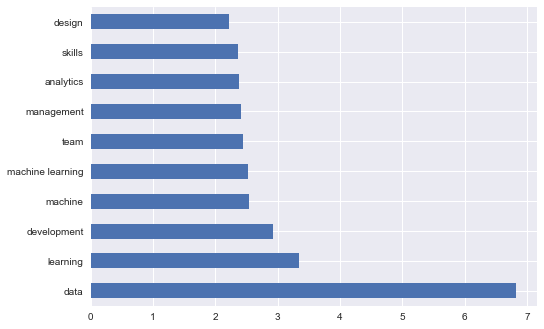

In [133]:
fw = freq_words[:10]
fw.plot(kind='barh')
#sns.countplot(x=lr.index, data=lr)
plt.show()

## Classifying Data Science Jobs

For the second prompt, classifying data science jobs, boosted decision trees turn out to be a better classifier than logisitic regression. Whereas the latter classifier roughly achieves the baseline of 82% accuracy - here meaning a guess that each posting in our simple does not represent a data science job - we generate a lift of 1.13 using boosted decision trees with default parameters and simple word count. As above, the abundance of features and small cross validation sizes yield significant spread in results.

In [105]:
#ds_jobs baseline
mask = scraped_postings['ds_job'] == 1
1- (float(len(scraped_postings[mask])) / scraped_postings.shape[0])

0.8159126365054602

In [129]:
X_all = cvt.fit_transform(scraped_postings['summary'])
y = scraped_postings['ds_job']
print(cross_val_score(AdaBoostClassifier(), X_all, y)) 

[ 0.93023256  0.89671362  0.85915493]


In [124]:
X = scraped_postings['summary']
y = scraped_postings['ds_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
cvt = CountVectorizer(stop_words=english,  ngram_range=(1,2))
pipeline = Pipeline([
    ('vect', cvt),
#    ('tfidf', TfidfTransformer()),
    ('cls', AdaBoostClassifier())
]) 
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.92248062015503873

The classification report demonstrates that the classifier precisely tagged jobs that were not data science jobs - in 95% of cases, jobs tagged as not data science jobs were not data science jobs. Likewise, the classifier tagged a higher rate of total non-data science postings, nearly 96%. That said, the classifier performed very well predicting the minority class of data science jobs, guessing correctly 78% of the time and identifying 70% of cases. These results seem particularly impressive when reconsidering that I tagged the postings as data science jobs or not subjectively, based on a quick scan of job titles.

In [128]:
print(classification_report(y_test, predicted, target_names=["other", "ds_job"]))

             precision    recall  f1-score   support

      other       0.95      0.96      0.95       109
     ds_job       0.78      0.70      0.74        20

avg / total       0.92      0.92      0.92       129



### Important Predictors - Occupation

Though boosted decision trees provided a better score, logistic regression coefficients derived from word counts once again provide insight about what differentiates the occupation groups. The strongest predictors of whether a job is a data science job are identical to those terms likewise predicting high salary. We also see the presence of data mining, predictive modeling, data visualization, and deep learning, among other terms, as predicting data science roles. Negatively predicting a data science role, as with income: requiring only a bachelor’s degree.

In [142]:
X = cvt.fit_transform(scraped_postings['summary'])
y = scraped_postings['ds_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
features = np.array(cvt.get_feature_names())
lr_coefs = pd.DataFrame({'coef':lr.coef_[0]},index=features)
lr_coefs = lr_coefs.sort_values('coef',ascending=False)
lr_coefs.head(15)

,coef
machine learning,0.722316
data scientist,0.432207
big data,0.419141
data science,0.330205
predictive models,0.134650
data visualization,0.118815
predictive modeling,0.104879
deep learning,0.104829
learning techniques,0.103479
data mining,0.100352


In [145]:
lr_coefs.tail()

,coef
communication skills,-0.225888
education bachelor,-0.354551
type full time,-0.410733
type full,-0.410733
full time,-0.454437


### Characterizing Job Postings by Occupation

As above, I use term frequency to characterize data science jobs and data related jobs though the classifier performed better using word counts. The distinctions here are much clearer than that of income level. Data related (non Data Science) jobs in the sample commonly invoke marketing, clinical, and research applications. Software is likewise common but no specific tools or applications are listed. Data Science jobs, on the other hand, commonly invoke machine learning, analytics, modeling, python, and big data. I think the data science jobs, via these terms, offer a much stronger sense of coherence than the broader group of data related jobs.

In [119]:
#tfidf for postings not tagged data science postings
mask = scraped_postings['ds_job'] == 0
tfidf = TfidfVectorizer(stop_words=english, ngram_range=(1,4))
X_all = tfidf.fit_transform(scraped_postings.ix[mask,'summary'])
columns  =  np.array(tfidf.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:15]

data           9.189892
development    6.979458
marketing      6.885673
skills         6.433163
team           5.898329
sales          5.884908
clinical       5.803983
management     5.725871
ability        5.495082
support        5.203179
research       5.033285
analysis       5.020574
software       4.952255
strong         4.815434
systems        4.758234
dtype: float64

In [118]:
#tfidf for postings not tagged data science postings
mask = scraped_postings['ds_job'] == 1
tfidf = TfidfVectorizer(stop_words=english, ngram_range=(1,4))
X_all = tfidf.fit_transform(scraped_postings.ix[mask,'summary'])
columns  =  np.array(tfidf.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:10]

data                6.915183
learning            3.029908
machine             2.414281
machine learning    2.390501
science             1.982925
skills              1.788962
analysis            1.770923
analytics           1.761157
models              1.669913
big                 1.576679
python              1.516496
data science        1.508542
development         1.503688
big data            1.501329
statistical         1.455048
dtype: float64

That's all. Thanks for reading!